<a href="https://colab.research.google.com/github/ertgrulyksk/Deforestation-in-Amazonas-forest-fires/blob/main/Deforestation_in_Amazonas%3B_forest_fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import numpy as np 
import pandas as pd 


import seaborn as sns
import plotly.express as px
import geopandas as gpd


import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

import matplotlib.pyplot as plt

In [40]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 94.1 MB/s eta 0:00:00


In [42]:
fire_file=pd.read_csv('amazon.csv'
                     , encoding='latin1')
fire_file.head(5)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [43]:
latitude={'Acre':-9.02,'Alagoas':-9.57,'Amapa':02.05,'Amazonas':-5.00,'Bahia':-12.00,'Ceara':-5.00,
          
          'Distrito Federal':-15.45,'Espirito Santo':-20.00,'Goias':-15.55,'Maranhao':-5.00,'Mato Grosso':-14.00
          
          ,'Minas Gerais':-18.50,'Pará':-3.20,'Paraiba':-7.00,'Pernambuco':-8.00,'Piau':-7.00,'Rio':-22.90,
          
          'Rondonia':-11.00,'Roraima':-2.00,'Santa Catarina':-27.25,'Sao Paulo':-23.32,'Sergipe':-10.30,
         
         'Tocantins':-10.00
         }


longitude={
    'Acre':-70.8120,'Alagoas':-36.7820,'Amapa':-50.50,'Amazonas':-65.00,'Bahia':-42.00,'Ceara':-40.00,
    
    'Distrito Federal':-47.45,'Espirito Santo':-40.45,'Goias':-50.10,'Maranhao':-46.00,'Mato Grosso':-55.00,
    
    'Minas Gerais':-46.00,'Pará':-52.00,'Paraiba':-36.00,'Pernambuco':-37.00,'Piau':-73.00, 'Rio':-43.17,
    
    'Rondonia':-63.00,'Roraima':-61.30,'Santa Catarina':-48.30,'Sao Paulo':-46.37,'Sergipe':-37.30,
    
    'Tocantins':-48.00
}

In [44]:
fire_file['latitude']=fire_file['state'].map(latitude)
fire_file['longitude']=fire_file['state'].map(longitude)
fire_file

,year,state,month,number,date,latitude,longitude
0,1998,Acre,Janeiro,0.0,1998-01-01,-9.02,-70.812
1,1999,Acre,Janeiro,0.0,1999-01-01,-9.02,-70.812
2,2000,Acre,Janeiro,0.0,2000-01-01,-9.02,-70.812
3,2001,Acre,Janeiro,0.0,2001-01-01,-9.02,-70.812
4,2002,Acre,Janeiro,0.0,2002-01-01,-9.02,-70.812
...,...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,-10.00,-48.000
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,-10.00,-48.000
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,-10.00,-48.000
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,-10.00,-48.000


/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


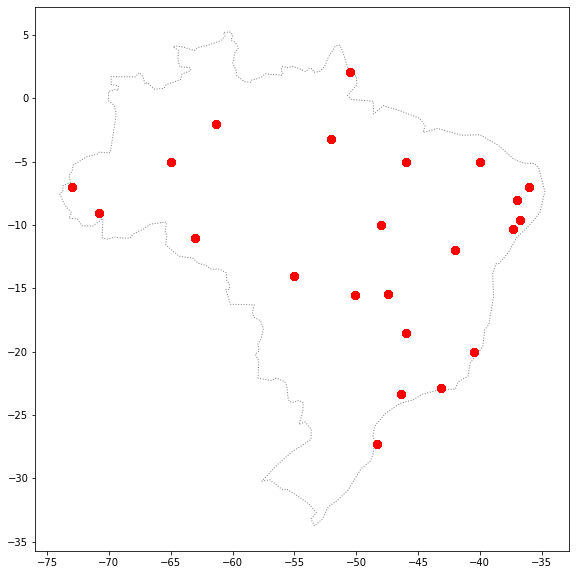

In [45]:
fire_file_gpd=gpd.GeoDataFrame(fire_file,geometry=gpd.points_from_xy(fire_file['longitude'],fire_file['latitude']))
fire_file_gpd.crs={'init':'epsg:4326'}

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin([ 'South America'])]
americas=americas.loc[americas['name']=='Brazil']

ax = americas.plot(figsize=(10,10), color='white', linestyle=':', edgecolor='gray')
fire_file_gpd.plot(ax=ax, markersize=50,color='red')

In [47]:
year_fires=fire_file[fire_file.year==1998]
year_fires

,year,state,month,number,date,latitude,longitude,geometry
0,1998,Acre,Janeiro,0.000,1998-01-01,-9.02,-70.812,POINT (-70.81200 -9.02000)
20,1998,Acre,Fevereiro,0.000,1998-01-01,-9.02,-70.812,POINT (-70.81200 -9.02000)
40,1998,Acre,Março,0.000,1998-01-01,-9.02,-70.812,POINT (-70.81200 -9.02000)
60,1998,Acre,Abril,0.000,1998-01-01,-9.02,-70.812,POINT (-70.81200 -9.02000)
80,1998,Acre,Maio,0.000,1998-01-01,-9.02,-70.812,POINT (-70.81200 -9.02000)
...,...,...,...,...,...,...,...,...
6355,1998,Tocantins,Agosto,3.747,1998-01-01,-10.00,-48.000,POINT (-48.00000 -10.00000)
6375,1998,Tocantins,Setembro,5.149,1998-01-01,-10.00,-48.000,POINT (-48.00000 -10.00000)
6395,1998,Tocantins,Outubro,1.738,1998-01-01,-10.00,-48.000,POINT (-48.00000 -10.00000)
6415,1998,Tocantins,Novembro,1.000,1998-01-01,-10.00,-48.000,POINT (-48.00000 -10.00000)


In [49]:
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')


m_4 = folium.Map(location=[-14.23,-51.92], tiles='cartodbpositron', zoom_start=4)


def color_producer(val):
    if val =='january':
        return 'darkred'
    
    elif val=='feburary':
        return 'blue'
    
    elif val=='march':
        return 'darkgreen'
    
    elif val=='april':
        return 'green'
    
    elif val=='may':
        return 'yellow'
    
    elif val=='june':
        return 'orange'
    
    elif val=='july':
        return 'red'
    
    elif val=='september':
        return 'darkpurple'
    
    elif val=='october':
        return 'black'
    
    elif val=='november':
        return 'lightred'
    elif val=='december':
        return 'lightgreen'
    
    
  


# 
for i,row in year_fires.iterrows():
    Circle(
        location=[row['latitude'], row['longitude']],
        radius=20,
        color=color_producer(row['month'])).add_to(m_4)


embed_map(m_4, 'm_4.html')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'MAYOR NÚMERO DE INCENDIOS')

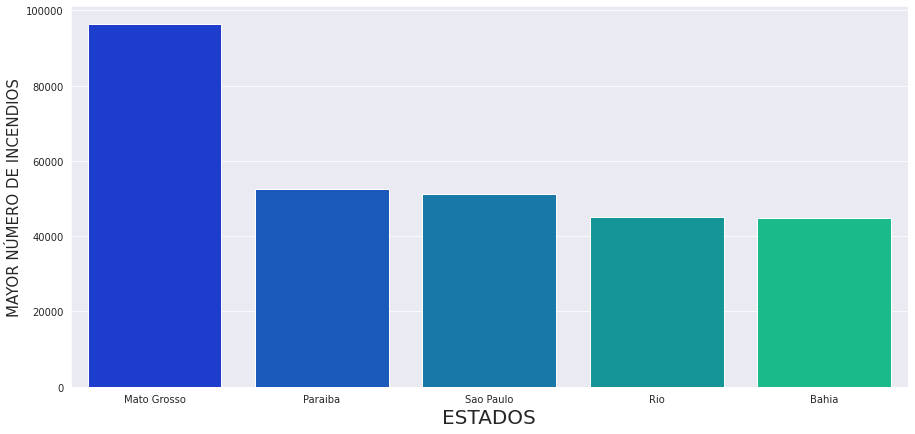

In [53]:
total_state_fires=fire_file.groupby('state')

states_names=list(fire_file.state.unique())

top_5_states_numbers=[]
top_5_states_names=[]


for state in states_names:
    top_5_states_numbers.append(total_state_fires.get_group(state).number.sum())
    
    top_5_states_names.append(state)
    
    
df_total_fires=pd.DataFrame(data={'States':top_5_states_names,
                                 'Total_Fires':top_5_states_numbers},columns=['States','Total_Fires'])

df_total_fires=df_total_fires.sort_values(['Total_Fires'],ascending=False).iloc[:5]

sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
sns.barplot(df_total_fires.States,df_total_fires.Total_Fires,palette='winter')
plt.xlabel('ESTADOS',fontsize=20)
plt.ylabel('MAYOR NÚMERO DE INCENDIOS',fontsize=15)

In [54]:
def annual_analysis_for_state(state_name):

    states=fire_file.groupby('state') 

    state_name_group=states.get_group(str(state_name))

    state_name_year=state_name_group.groupby('year')
    years=list(fire_file.year.unique())

    total_annual_fires=[]


    for year in years:
        total_annual_fires.append(state_name_year.get_group(year).number.sum())
    years_df=pd.DataFrame(data={'Years':years,
                                'Total_Fires':total_annual_fires})

    plt.figure(figsize=(20,10))


    fig = px.bar(years_df, x='Years', y='Total_Fires',color='Total_Fires')

    fig.update_layout(
        title="TENDENCIAS DE LOS INCENDIOS FORESTALES EN "+str(state_name.upper()),
        xaxis_title="AÑOS",
        yaxis_title="NÚMERO TOTAL DE INCENDIOS",
        font=dict(
            family="Courier New",
            size=18,
            color="black"
        )
    )
    fig.show()

In [55]:
annual_analysis_for_state('Acre')

<Figure size 1440x720 with 0 Axes>